## Q-learning

This notebook will guide you through implementation of vanilla Q-learning algorithm.

You need to implement QLearningAgent (follow instructions for each method) and use it on a number of tests below.

In [2]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1
        
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
%%writefile qlearning.py
from collections import defaultdict
import random, math
import numpy as np

class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, get_legal_actions):
        """
        Q-Learning Agent
        based on http://inst.eecs.berkeley.edu/~cs188/sp09/pacman.html
        Instance variables you have access to
          - self.epsilon (exploration prob)
          - self.alpha (learning rate)
          - self.discount (discount rate aka gamma)

        Functions you should use
          - self.get_legal_actions(state) {state, hashable -> list of actions, each is hashable}
            which returns legal actions for a state
          - self.get_qvalue(state,action)
            which returns Q(state,action)
          - self.set_qvalue(state,action,value)
            which sets Q(state,action) := value

        !!!Important!!!
        Note: please avoid using self._qValues directly. 
            There's a special self.get_qvalue/set_qvalue for that.
        """

        self.get_legal_actions = get_legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        """ Returns Q(state,action) """
        return self._qvalues[state][action]

    def set_qvalue(self,state,action,value):
        """ Sets the Qvalue for [state,action] to the given value """
        self._qvalues[state][action] = value

    #---------------------START OF YOUR CODE---------------------#

    def get_value(self, state):
        """
        Compute your agent's estimate of V(s) using current q-values
        V(s) = max_over_action Q(state,action) over possible actions.
        Note: please take into account that q-values can be negative.
        """
        possible_actions = self.get_legal_actions(state)

        #If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0

        q_sa = [self.get_qvalue(state, action) for action in possible_actions]

        return max(q_sa)

    def update(self, state, action, reward, next_state):
        """
        You should do your Q-Value update here:
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
        """

        #agent parameters
        gamma = self.discount
        learning_rate = self.alpha

        v = self.get_value(next_state)
        q = (1-learning_rate) * self.get_qvalue(state,action) + learning_rate*(reward+gamma*v)
        
        self.set_qvalue(state, action, q)

    
    def get_best_action(self, state):
        """
        Compute the best action to take in a state (using current q-values). 
        """
        possible_actions = self.get_legal_actions(state)

        #If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        act_dict = {}
        for action in possible_actions:
            act_dict[action] = self.get_qvalue(state, action)
        best_action = max(act_dict, key=act_dict.get)

#         logits = np.zeros(len(possible_actions))
#         for ind,action in enumerate(possible_actions):
#             logits[ind] = self.get_qvalue(state,action)
#         logits_exp = np.exp(logits)
#         probs = logits_exp/float(np.sum(logits_exp))
#         best_action = np.random.choice(possible_actions, p=probs)
        return best_action

    def get_action(self, state):
        """
        Compute the action to take in the current state, including exploration.  
        With probability self.epsilon, we should take a random action.
            otherwise - the best policy action (self.getPolicy).
        
        Note: To pick randomly from a list, use random.choice(list). 
              To pick True or False with a given probablity, generate uniform number in [0, 1]
              and compare it with your probability
        """

        # Pick Action
        possible_actions = self.get_legal_actions(state)
        action = None

        #If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        #agent parameters:
        epsilon = self.epsilon

        best_action = self.get_best_action(state)
        random_action = random.choice(possible_actions)
        chosen_action = random_action if random.random()<=epsilon else best_action
        
        return chosen_action

Overwriting qlearning.py


### Try it on taxi

Here we use the qlearning agent on taxi env from openai gym.
You will need to insert a few agent functions here.

In [4]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

/Users/aivanou/anaconda3/envs/python3_rl/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [5]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                       get_legal_actions = lambda s: range(n_actions))

In [6]:
def play_and_train(env,agent,t_max=10**4, render = False):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        # get agent to pick action given state s.
        a = agent.get_action(s)
        if render:
            plt.imshow(env.render('rgb_array'))
        next_s, r, done, _ = env.step(a)
        
        # train (update) agent for state s
        agent.update(s, a, r, next_s)
        
        s = next_s
        total_reward +=r
        if done: break
        
    return total_reward
    
        
    

eps = 1.260215853156675e-09 mean reward = 8.1


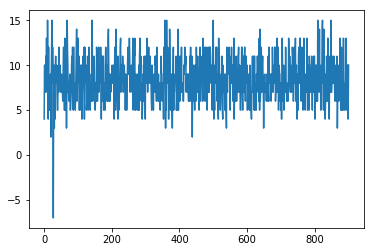

In [8]:
from IPython.display import clear_output

rewards = []
env.reset()
for i in range(1000):
    rewards.append(play_and_train(env, agent))
    agent.epsilon *= 0.99
    
    if i %100 ==0:
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards[-10:]))
        plt.plot(rewards)
        plt.show()
        

### Submit to Coursera I: Preparation

In [7]:
# from submit import submit_qlearning1
# submit_qlearning1(rewards, <EMAIL>, <TOKEN>)
submit_rewards1 = rewards.copy()

# Binarized state spaces

Use agent to train efficiently on CartPole-v0.
This environment has a continuous set of possible states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

/Users/aivanou/anaconda3/envs/python3_rl/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


first state:[-0.009251    0.03291566 -0.04383304 -0.04600597]


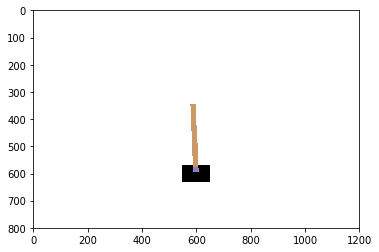

In [9]:
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s" % (env.reset()))
plt.imshow(env.render('rgb_array'))

### Play a few games

We need to estimate observation distributions. To do so, we'll play a few games and record all states.

[-0.02228338 -0.00096622 -0.00356986  0.03762912]


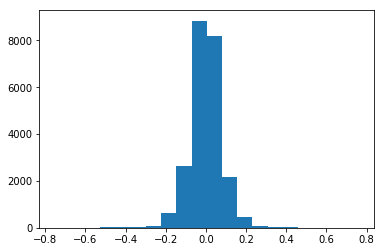

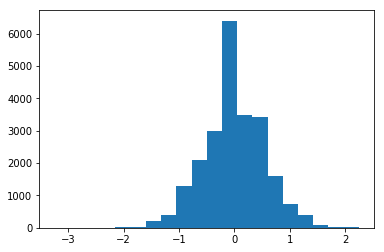

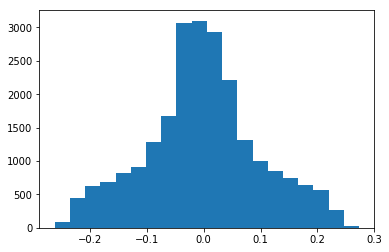

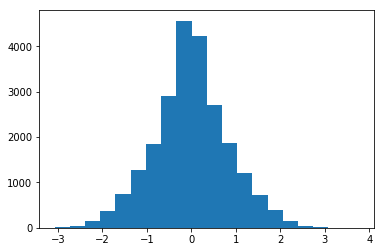

In [10]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s, r, done, _ = env.step(env.action_space.sample())
        all_states.append(s)
        if done: break
            
all_states = np.array(all_states)
print(all_states[0])
for obs_i in range(env.observation_space.shape[0]):
    plt.hist(all_states[:, obs_i], bins=20)
    plt.show()

## Binarize environment

In [11]:
from gym.core import ObservationWrapper
class Binarizer(ObservationWrapper):
    
    def _observation(self, state):    
        
        #state = <round state to some amount digits.>
        #hint: you can do that with round(x,n_digits)
        #you will need to pick a different n_digits for each dimension

        state[0] = np.round(state[0], 0)
        state[1] = np.round(state[1], 1)
        state[2] = np.round(state[2], 2)
        state[3] = np.round(state[3], 1)
        return tuple(state)

In [12]:
s, r, done, _ = env.step(env.action_space.sample())
np.round(s,2)
s

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


array([-0.02770359,  1.01841295, -0.26461112, -2.25392687])

In [13]:
env = Binarizer(gym.make("CartPole-v0"))

WARN: <class '__main__.Binarizer'> doesn't implement 'observation' method. Maybe it implements deprecated '_observation' method.


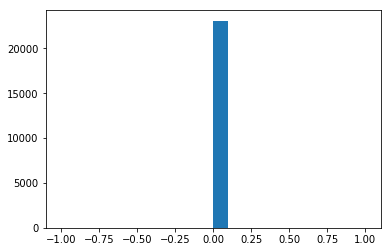

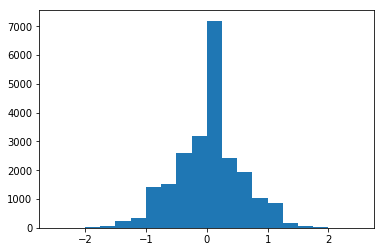

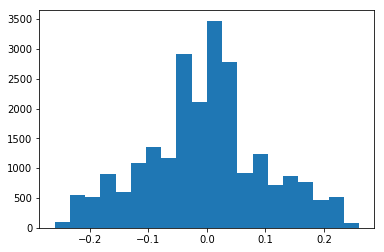

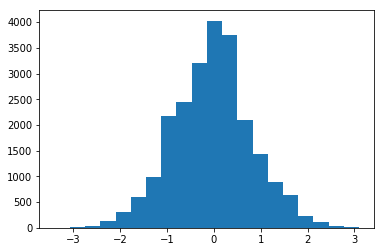

In [14]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s, r, done, _ = env.step(env.action_space.sample())
        all_states.append(s)
        if done: break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    
    plt.hist(all_states[:,obs_i],bins=20)
    plt.show()

## Learn binarized policy

Now let's train a policy that uses binarized state space.

__Tips:__ 
* If your binarization is too coarse, your agent may fail to find optimal policy. In that case, change binarization. 
* If your binarization is too fine-grained, your agent will take much longer than 1000 steps to converge. You can either increase number of iterations and decrease epsilon decay or change binarization.
* Having 10^3 ~ 10^4 distinct states is recommended (`len(QLearningAgent._qvalues)`), but not required.


In [15]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                       get_legal_actions = lambda s: range(n_actions))

eps = 0.018150182014126093 mean reward = 26.1


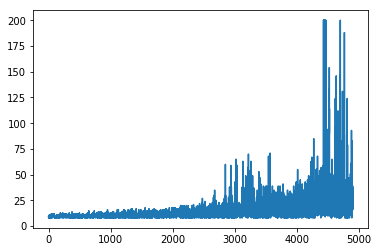

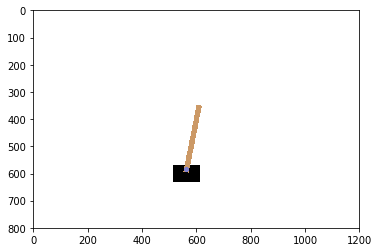

In [16]:
rewards = []
agent.epsilon = 0.03
for i in range(5000):
    rewards.append(play_and_train(env,agent))   
    
    #OPTIONAL YOUR CODE: adjust epsilon
    if i %100 ==0:
        agent.epsilon*=0.99
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards[-10:]))
        plt.plot(rewards)
        plt.show()

# rewards.append(play_and_train(env,agent, render=True))  

### Submit to Coursera II: Submission

In [ ]:
# from submit import submit_qlearning2
# submit_qlearning2(rewards, <EMAIL>, <TOKEN>)
submit_rewards2 = rewards.copy()
from submit import submit_qlearning_all
submit_qlearning_all(submit_rewards1, submit_rewards2, <EMAIL>, <TOKEN>)

In [31]:
## mountain car

In [9]:
env_name = 'MountainCar-v0'
env = gym.make(env_name)
env.seed(0)
np.random.seed(0)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [10]:
obs = env.reset()
print(env.observation_space.low)
print(env.observation_space.high)
n_states = 40

def obs_to_state(env, obs):
    """ Maps an observation to state """
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_dx = (env_high - env_low) / n_states
    a = int((obs[0] - env_low[0])/env_dx[0])
    b = int((obs[1] - env_low[1])/env_dx[1])
    return a, b

obs_to_state(env, obs)

[-1.2  -0.07]
[0.6  0.07]


(13, 19)

(array([-5.92293618e-01,  1.98236975e-05]), -1.0, False, {})

In [11]:
from collections import defaultdict
import random, math
import numpy as np

class QLearningAgent_my:
    def __init__(self, alpha, epsilon, discount, get_legal_actions):
        """
        Q-Learning Agent
        based on http://inst.eecs.berkeley.edu/~cs188/sp09/pacman.html
        Instance variables you have access to
          - self.epsilon (exploration prob)
          - self.alpha (learning rate)
          - self.discount (discount rate aka gamma)

        Functions you should use
          - self.get_legal_actions(state) {state, hashable -> list of actions, each is hashable}
            which returns legal actions for a state
          - self.get_qvalue(state,action)
            which returns Q(state,action)
          - self.set_qvalue(state,action,value)
            which sets Q(state,action) := value

        !!!Important!!!
        Note: please avoid using self._qValues directly. 
            There's a special self.get_qvalue/set_qvalue for that.
        """

        self.get_legal_actions = get_legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        """ Returns Q(state,action) """
        return self._qvalues[state][action]

    def set_qvalue(self,state,action,value):
        """ Sets the Qvalue for [state,action] to the given value """
        self._qvalues[state][action] = value

    #---------------------START OF YOUR CODE---------------------#

    def get_value(self, state):
        """
        Compute your agent's estimate of V(s) using current q-values
        V(s) = max_over_action Q(state,action) over possible actions.
        Note: please take into account that q-values can be negative.
        """
        possible_actions = self.get_legal_actions(state)

        #If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0

        q_sa = [self.get_qvalue(state, action) for action in possible_actions]

        return max(max(q_sa), 0)

    def update(self, state, action, reward, next_state):
        """
        You should do your Q-Value update here:
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
        """

        #agent parameters
        gamma = self.discount
        learning_rate = self.alpha

        v = self.get_value(next_state)
        q = (1-learning_rate) * self.get_qvalue(state,action) + learning_rate*(reward+gamma*v)
        
        self.set_qvalue(state, action, q)

    
    def get_best_action(self, state):
        """
        Compute the best action to take in a state (using current q-values). 
        """
        possible_actions = self.get_legal_actions(state)

        #If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

#         act_dict = {}
#         for action in possible_actions:
#             act_dict[action] = self.get_qvalue(state, action)
#         best_action = max(act_dict, key=act_dict.get)

        logits = np.zeros(len(possible_actions))
        for action in possible_actions:
            logits[action] = np.exp(self.get_qvalue(state, action))
        logits_exp = np.exp(logits)
        probs = logits_exp/np.sum(logits_exp)
        best_action = np.random.choice(possible_actions, p = probs)
        return best_action

    def get_action(self, state):
        """
        Compute the action to take in the current state, including exploration.  
        With probability self.epsilon, we should take a random action.
            otherwise - the best policy action (self.getPolicy).
        
        Note: To pick randomly from a list, use random.choice(list). 
              To pick True or False with a given probablity, generate uniform number in [0, 1]
              and compare it with your probability
        """

        # Pick Action
        possible_actions = self.get_legal_actions(state)
        action = None

        #If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        #agent parameters:
        epsilon = self.epsilon

        best_action = self.get_best_action(state)
        random_action = random.choice(possible_actions)
        chosen_action = random_action if np.random.uniform(0, 1)<=epsilon else best_action
        
        return chosen_action

In [12]:
def play_and_train(env,agent,t_max=10**4):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    coords = env.reset()
    s = obs_to_state(env,coords)
    for t in range(t_max):
        # get agent to pick action given state s.
        a = agent.get_action(s)
        
        coords, r, done, _ = env.step(a)
        next_s = obs_to_state(env, coords)
        # train (update) agent for state s
        agent.update(s, a, r, next_s)
        
        s = next_s
        total_reward +=r
        if done: break
        
    return total_reward


In [13]:
n_actions = env.action_space.n
agent = QLearningAgent_my(alpha=0.5, epsilon=0.25, discount=0.99,
                       get_legal_actions = lambda s: range(n_actions))

eps = 1.2702724167857977e-64 mean reward = -200.0


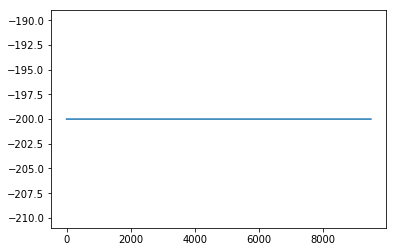

In [18]:
from IPython.display import clear_output

rewards = []
env.reset()
for i in range(10000):
    rewards.append(play_and_train(env, agent))
    agent.epsilon *= 0.99
    
    if i %500 ==0:
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards[-10:]))
        plt.plot(rewards)
        plt.show()
        

0
done


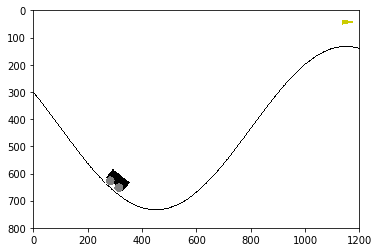

In [19]:

print(max(agent._qvalues[(24, 12)], key=agent._qvalues[(24, 12)].get))

opt_policy = {}
for state,action_dict in agent._qvalues.items():
    opt_policy[state] = max(agent._qvalues[state], key=agent._qvalues[state].get)
    
t_max = 10000
gamma = 1.0

def run_episode(env, policy=None, render=True):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    for _ in range(t_max):
        if render:
            plt.imshow(env.render('rgb_array'))
        if policy is None:
            action = env.action_space.sample()
        else:
            state = obs_to_state(env, obs)
            action = policy[state]
        obs, reward, done, _ = env.step(action)
        total_reward += gamma ** step_idx * reward
        step_idx += 1
        if done:
            print('done')
            break
    return total_reward

run_episode(env, opt_policy, True)

plt.imshow(env.render('rgb_array'))

In [1]:
# import numpy as np

# import gym
# from gym import wrappers

# n_states = 40
# iter_max = 10000

# initial_lr = 1.0 # Learning rate
# min_lr = 0.003
# gamma = 1.0
# t_max = 10000
# eps = 0.02

# def run_episode(env, policy=None, render=True):
#     obs = env.reset()
#     total_reward = 0
#     step_idx = 0
#     for _ in range(t_max):
#         if render:
#             env.render()
#         if policy is None:
#             action = env.action_space.sample()
#         else:
#             a,b = obs_to_state(env, obs)
#             action = policy[a][b]
#         obs, reward, done, _ = env.step(action)
#         total_reward += gamma ** step_idx * reward
#         step_idx += 1
#         if done:
#             break
#     return total_reward

# def obs_to_state(env, obs):
#     """ Maps an observation to state """
#     env_low = env.observation_space.low
#     env_high = env.observation_space.high
#     env_dx = (env_high - env_low) / n_states
#     a = int((obs[0] - env_low[0])/env_dx[0])
#     b = int((obs[1] - env_low[1])/env_dx[1])
#     return a, b

# env_name = 'MountainCar-v0'
# env = gym.make(env_name)
# env.seed(0)
# np.random.seed(0)
# print ('----- using Q Learning -----')
# q_table = np.zeros((n_states, n_states, 3))
#     for i in range(iter_max):
#         obs = env.reset()
#         total_reward = 0
#         ## eta: learning rate is decreased at each step
#         eta = max(min_lr, initial_lr * (0.85 ** (i//100)))
#         for j in range(t_max):
#             a, b = obs_to_state(env, obs)
#             if np.random.uniform(0, 1) < eps:
#                 action = np.random.choice(env.action_space.n)
#             else:
#                 logits = q_table[a][b]
#                 logits_exp = np.exp(logits)
#                 probs = logits_exp / np.sum(logits_exp)
#                 action = np.random.choice(env.action_space.n, p=probs)
#             obs, reward, done, _ = env.step(action)
#             total_reward += reward
#             # update q table
#             a_, b_ = obs_to_state(env, obs)
#             q_table[a][b][action] = q_table[a][b][action] + eta * (reward + gamma *  np.max(q_table[a_][b_]) - q_table[a][b][action])
#             if done:
#                 break
#         if i % 100 == 0:
#             print('Iteration #%d -- Total reward = %d.' %(i+1, total_reward))
#     solution_policy = np.argmax(q_table, axis=2)
#     solution_policy_scores = [run_episode(env, solution_policy, False) for _ in range(100)]
#     print("Average score of solution = ", np.mean(solution_policy_scores))
#     # Animate it
#     run_episode(env, solution_policy, True)


-119.0

In [ ]:
from time import sleep

def run_episode(env, policy=None, render=True):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    for _ in range(t_max):
        if render:
            plt.imshow(env.render('rgb_array'))
        if policy is None:
            action = env.action_space.sample()
        else:
            a,b = obs_to_state(env, obs)
            action = policy[a][b]
        obs, reward, done, _ = env.step(action)
        total_reward += gamma ** step_idx * reward
        step_idx += 1
        sleep(0.5)
        clear_output(True)
        if done:
            print('done')
            break
    return total_reward

env_name = 'MountainCar-v0'
env = gym.make(env_name)
env.seed(0)
np.random.seed(0)

print("first state:%s" % (env.reset()))

run_episode(env, solution_policy, True)
plt.imshow(env.render('rgb_array'))
